# LDA with Highlights

## Imports

In [36]:
import joblib

import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jensenshannon
import ipywidgets

from bbcov import DummyModel, LDAModel, Embedder, QueryMachine

## Data

In [133]:
df_docs = pd.read_pickle("../preproccessed_data/v4_json_metadata_v2.pkl")
df_docs = df_docs
df_docs.shape

(29135, 18)

In [134]:
df_docs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29135 entries, 0001418189999fea7f7cbe3e82703d71c85a6fe5 to fffaed7e9353b7df6c4ca8f66b62e117013cb86d
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        29135 non-null  object        
 1   abstract                     29135 non-null  object        
 2   text                         29135 non-null  object        
 3   sections                     29135 non-null  object        
 4   ref_captions                 29135 non-null  object        
 5   all_text                     29135 non-null  object        
 6   source_x                     27675 non-null  object        
 7   doi                          27365 non-null  object        
 8   pmcid                        12077 non-null  object        
 9   pubmed_id                    20815 non-null  float64       
 10  license                      27675 no

In [135]:
df_docs.head()

,title,abstract,text,sections,ref_captions,all_text,source_x,doi,pmcid,pubmed_id,license,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
sha,,,,,,,,,,,,,,,,,,
0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,Feline infectious peritonitis virus (FIPV) pos...,Feline infectious peritonitis (FIP) is a fatal...,Results\nIsolation of FIPV positive cells\nCat...,Surface expression of the monocyte marker (A);...,Feline infectious peritonitis virus (FIPV) pos...,Elsevier,10.1016/j.vetmic.2006.11.026,NaN,17188823.0,els-covid,2007-03-31,"Cornelissen, E.; Dewerchin, H.L.; Van Hamme, E...",Veterinary Microbiology,NaN,NaN,True,custom_license
00016663c74157a66b4d509d5c4edffd5391bbe0,,,Viruses are increasingly recognised as pathoge...,Burden of disease studies\nAn integrated molec...,Scheme for foodborne virus tracking. Virus det...,\nViruses are increasingly recognised as patho...,Elsevier,10.1533/9781845691394.1.77,NaN,NaN,els-covid,2006-12-31,"Duizer, E.; Koopmans, M.",Emerging Foodborne Pathogens,NaN,NaN,True,custom_license
0005d253951fedc237715a37db147032eea28912,,,Synthesized by William Prusoff in the late 195...,\nLuis Mené ndez-Arias,//dx.doi.org/10.1016/j.coviro.2014.08.002 1879...,\nSynthesized by William Prusoff in the late 1...,Elsevier,10.1016/j.coviro.2014.08.002,NaN,25155454.0,els-covid,2014-10-31,"Menéndez-Arias, Luis; Richman, Douglas D",Current Opinion in Virology,NaN,NaN,True,custom_license
000affa746a03f1fe4e3b3ef1a62fdfa9b9ac52a,Correlation between antimicrobial consumption ...,Objectives: This study was conducted to invest...,The incidence of health-care-associated infect...,Antimicrobial agents and consumption\nCorrelat...,(A) Rates of methicillin-resistant Staphylococ...,Objectives: This study was conducted to invest...,Elsevier,10.1016/j.jmii.2013.10.008,NaN,24388582.0,els-covid,2015-08-31,"Lai, Chih-Cheng; Chu, Chen-Chen; Cheng, Aristi...","Journal of Microbiology, Immunology and Infection",NaN,NaN,True,custom_license
000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,,- Figure S1 : Phylogeny of all sequences belon...,,Table S4. Bats cytochrome b sequences data set...,\n- Figure S1 : Phylogeny of all sequences bel...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


## Dummy Model

In [2]:
model = DummyModel(d_embedding=5)
embedder = Embedder(model)

In [3]:
embedder("test")

array([[-0.99570137, -0.20580137,  0.04149257,  0.45220742,  0.77187658]])

In [4]:
embedder(["test1", "test2"])

array([[-0.02197083,  0.05120264,  0.070866  , -1.70837688, -0.97788063],
       [-1.03407554, -1.11790396, -1.51971689, -2.43708308, -0.07045687]])

In [9]:
query_machine = QueryMachine(embedder, df_docs, 'text')

In [10]:
query = "Hello"

In [11]:
doc_ids = query_machine.get_top_k_docs(query)
doc_ids

array([558, 300, 819])

In [12]:
query_machine.get_most_relevant_paragraphs(query, doc_ids)

(['The bovine placenta does not permit the passive transfer of antibody to the fetus. As a result, the newborn calf does not receive any antibody from the dam and is very susceptible to environmental pathogens. Resistance of the calf to enteric disease is closely related to the timely consumption of high-quality colostrum in sufficient quantities [7] . The neonatal calf should ideally receive 2∼3 L (for beef calves) or 3∼4 L (in dairy calves) of colostrum within the first 6 h after birth [22] . The colostrum contains antibodies, immune cells (neutrophils, macrophages, T cells, and B cells), complements, lactoferrin, insulin-like growth factor-1, transforming growth factor, interferon, and other soluble factors as well as nutrients (sugars and fat-soluble vitamins) [94] . Immunoglobulin G is the primary antibody isotype in bovine colostrum. The quality of colostrum varies based on calving number, nutritional status, and vaccination of the cow [98] . However, calves born to heifers can r

- documents = collections of paragraphs + embedding + metadata
- query text
- 1. find matching documents:
    - compute embedding of query
    - pre-compute embeddings of all documents (`body_text = concat(paragraphs)`)
- 2. 

- give a query
- provide all documents
- find top 3 matching documents
- highlight most matching paragraph for each document

## LDA Model

In [136]:
import en_core_sci_md

nlp = en_core_sci_md.load(disable=["tagger", "parser", "ner"])
nlp.max_length = 2_000_000  # maximal number of characters in text

In [137]:
def spacy_tokenizer(sentence):
    return [token.lemma_ for token in nlp(sentence) if not (
        token.like_url or
        token.like_email or
        token.like_num or
        token.is_stop or
        token.is_punct or
        token.is_space or
        token.is_bracket or
        token.is_punct or
        len(token)==1)]

In [7]:
vectorizer = joblib.load('1_topic_modeling_lda/tf_vectorizer.csv')
lda = joblib.load('1_topic_modeling_lda/lda.csv')

In [8]:
lda_model = LDAModel(vectorizer, lda)
lda_embedder = Embedder(lda_model)

In [138]:
query_machine = QueryMachine(lda_embedder, df_docs, 'text', jensenshannon)

In [139]:
query = "Inhibition of N-glycosylation (using N-glycosylation inhibitors or Lectins) is a potential therapeutic approach for COVID-19 therapy."

In [140]:
doc_ids = query_machine.get_top_k_docs(query)
doc_ids

Index(['2ebbf143f9b3fd5c5e5c7e74cc939d1420bc7de1',
       'e888985a66c69031003933c33f92352a8c76ad0d',
       '3549df51a2aae3cc1a6e775f0bbfd1386334665c'],
      dtype='object', name='sha')

In [141]:
df_docs.loc[doc_ids][['title']].style.hide_index()

title
Biological importance of marine algae
"Genus Psoralea: A review of the traditional and modern uses, phytochemistry and pharmacology"
""


In [142]:
query_machine.get_most_relevant_paragraphs(query, doc_ids)

(['The above data proved that the probability of finding bioactive compounds from dinoflagellates is very high.',
  'The medicinal herbs have been a major source of biodynamic compounds of therapeutic value in Ayurveda, Unani, Homeopathy, Traditional Chinese medicine (TCM) and other traditional system of medicines. Several dreadful diseases including cancer, AIDS, kidney',
  ', 8,11,13-tetraen-7- one 29:100 activity in EBV assay system 29:100 Ent- , 13(15)-dien-16,12- olide (jolkiolide E) 9:283, 284, 11, activity in EBV assay system 29:99 18-nor- 11, 7c~, triol 29:99 activity in EBV assay system 29:99 Abieta- 8,11,13-triene-7cz, 15,18-triol 29:99 activity in EBV assay system 29:99 Abieta- 8,11,13-triene-7c~,l 5,18-triol 7- 816 from (15R)-I 5-acetoxy-15,20dihydro catharanthine 14:815,816 1 ot-Acetoxy-20Ctv-hydroxy-24tx,25 c~epoxywitha-5-ene-22,26-olide-413-0glucopyranoside 4, trien-3-one 11:398 (+)-1-Acetoxy-2-epipinoresinol 5:538-540 1 ct-Acetoxy-2ct,6 [3,9[3-trifuroyloxy-4[3- hydroxy-

In [143]:
query_machine.print_query("cure for covid-19", k=5)

/opt/conda/lib/python3.6/site-packages/scipy/spatial/distance.py:1296: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


Distance : 0.158
ID       : a50f3a7514dd9363e42a1eff725a7eb3e49b6ed2
Title    : 
Authors  : nan
Date     : NaT
Journal  : nan
DOI      : nan
--------------------- Relevant paragraph (distance: 0.158)----------------------
1 Supporting Text S1 infection (relative to control) 

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\

Distance : 0.271
ID       : 58383a13c8f80823bd6cf3516faf38c1687994a7
Title    : Heterogeneity in District-level Transmission of Ebola Virus Disease during the Epidemic in West Africa
Authors  : nan
Date     : NaT
Journal  : nan
DOI      : nan
--------------------- Relevant paragraph (distance: 0.271)----------------------
SEIR susceptible-exposed-infected-recovered model, IDEA incidence decay and exponential adjustment model, ABM agent-based model, BDEI birth-death-exposed-infected model, BD birthdeath model *corresponds to R e for the early period of May 27-August 4, 2014

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\

/opt/conda/lib/python3.6/site-packages/scipy/spatial/distance.py:1296: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


In [144]:
mask = ~(df_docs.title == '')

In [145]:
query_machine.print_query("cure for covid-19", k=5, df_mask=mask)

/opt/conda/lib/python3.6/site-packages/scipy/spatial/distance.py:1296: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


Distance : 0.271
ID       : 58383a13c8f80823bd6cf3516faf38c1687994a7
Title    : Heterogeneity in District-level Transmission of Ebola Virus Disease during the Epidemic in West Africa
Authors  : nan
Date     : NaT
Journal  : nan
DOI      : nan
--------------------- Relevant paragraph (distance: 0.271)----------------------
SEIR susceptible-exposed-infected-recovered model, IDEA incidence decay and exponential adjustment model, ABM agent-based model, BDEI birth-death-exposed-infected model, BD birthdeath model *corresponds to R e for the early period of May 27-August 4, 2014

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\

Distance : 0.298
ID       : 68a4cb26f4d7448117bfcb2d2794211c04605765
Title    : Additional file 3 -Three measures for geographical risk status
Authors  : nan
Date     : NaT
Journal  : nan
DOI      : nan
--------------------- Relevant paragraph (distance: 0.298)----------------------
reported in the state. (1), (2) and the cumulative nu

/opt/conda/lib/python3.6/site-packages/scipy/spatial/distance.py:1296: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/opt/conda/lib/python3.6/site-packages/scipy/spatial/distance.py:1296: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


To do ideas

- do data reading properly
- truncate dictionary
- better formatters
    - print formatter
    - HTML formatter
- more models
- several paragraphs instead of just one
- double check the results make sense
- exclusions
- visualise (PCA/t-SNE) doc embeddings together with the query embedding

- good highlights / paragraphs:
    - data preprocessing

## Create Query Widget

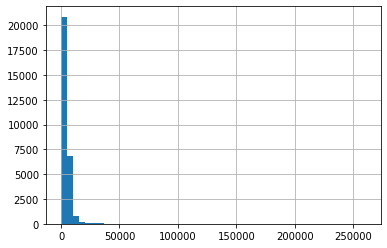

In [146]:
df_docs.text.apply(lambda x: len(x.split())).hist(bins=50)

In [159]:
min_year = df_docs.publish_time.min().year
max_year = df_docs.publish_time.max().year
word_counts = df_docs.text.apply(lambda x: len(x.split()))
min_word_count = word_counts.min()
max_word_count = word_counts.max()

@ipywidgets.interact(
    has_title=ipywidgets.Checkbox(
        description="Require Title",
        value=True),
    has_authors=ipywidgets.Checkbox(
        description="Require Authors",
        value=True),
    has_abstract=ipywidgets.Checkbox(
        description="Require Abstract",
        value=False),
    has_journal=ipywidgets.Checkbox(
        description="Require Journal",
        value=False),
    has_doi=ipywidgets.Checkbox(
        description="Require DOI",
        value=False),
    date_range=ipywidgets.IntRangeSlider(
        description="Date Range:",
        continuous_update=False,
        min=min_year,
        max=max_year,
        value=(min_year, max_year),
        layout=ipywidgets.Layout(width='80ch')),
    word_count_range=ipywidgets.IntRangeSlider(
        description="Text Word Count Range:",
        continuous_update=False,
        min=min_word_count,
        max=max_word_count,
        value=(min_word_count, max_word_count),
        style={'description_width': '20ch'},
        layout=ipywidgets.Layout(width='80ch')),
    k=ipywidgets.IntSlider(
        description="Top k:",
        value=3,
        min=1,
        max=30,
        continuous_update=False),
    text=ipywidgets.Textarea(
        description="Query:",
        value="cure for covid-19",
        continuous_update=False,
        layout=ipywidgets.Layout(width='80ch', height='200px')),
    inclusions=ipywidgets.Textarea(
        description="Required Phrases (one per line):",
        value="",
        continuous_update=False,
        style={'description_width': '30ch'},
        layout=ipywidgets.Layout(width='50ch', height='200px')),
    exclusions=ipywidgets.Textarea(
        description="Excluded Phrases (one per line):",
        value="",
        continuous_update=False,
        style={'description_width': '30ch'},
        layout=ipywidgets.Layout(width='50ch', height='200px')),
    button=ipywidgets.ToggleButton(description="Submit")
)
def _(k, date_range, word_count_range, has_title,
      has_authors, has_abstract, has_journal, has_doi, text,
      inclusions, exclusions, button):
    # Year filter
    from_year = pd.Timestamp(year=date_range[0], month=1, day=1)
    to_year = pd.Timestamp(year=date_range[1], month=12, day=31)
    mask = df_docs.publish_time.between(from_year, to_year)
    
    # Word counts
    mask &= word_counts.between(*word_count_range)
    
    if has_title:
        mask &= ~(df_docs.title.isna() | (df_docs.title == ''))
        
    if has_authors:
        mask &= ~(df_docs.authors.isna() | (df_docs.authors == ''))
    
    if has_abstract:
        mask &= ~(df_docs.abstract.isna() | (df_docs.abstract == ''))
        
    if has_journal:
        mask &= ~(df_docs.journal.isna() | (df_docs.journal == ''))
    
    if has_doi:
        mask &= ~(df_docs.doi.isna() | (df_docs.doi == ''))
    
    # Inclusions / exclusions
    df_docs_filtered = df_docs[mask]
    
    for phrase in inclusions.split('\n'):
        mask[mask] &= df_docs_filtered.text.str.contains(phrase, case=False)
        df_docs_filtered = df_docs[mask]
    
    for phrase in exclusions.split('\n'):
        if len(phrase) > 0:
            mask[mask] &= ~df_docs_filtered.text.str.contains(phrase, case=False)
            df_docs_filtered = df_docs[mask]
    
    print(f"Searching through {mask.sum()} of {len(mask)} documents")
    if len(inclusions) > 0:
        print("Inclusions:")
        print(inclusions)
    if len(exclusions) > 0:
        print("Exclusions:")
        print(exclusions)
    print("-" * 8)
    
    if any(mask):
        query_machine.print_query(text, k=k, df_mask=mask)

interactive(children=(IntSlider(value=3, continuous_update=False, description='Top k:', max=30, min=1), IntRan…

In [117]:
def relevant_articles_for_text():    
    textW = widgets.Textarea(
        value='',
        placeholder='Type something',
        description='',
        disabled=False,
        layout=widgets.Layout(width='90%', height='200px')
    )

    yearW = widgets.IntRangeSlider(min=1950, max=2020, value=[2010, 2020], description='Year Range', 
                               continuous_update=False, layout=widgets.Layout(width='40%'))
    covidW = widgets.Checkbox(value=True,description='Only COVID-19-Papers',disabled=False, indent=False, layout=widgets.Layout(width='25%'))
    kWidget = widgets.IntSlider(value=10, description='k', max=50, min=1, layout=widgets.Layout(width='25%'))

    button = widgets.Button(description="Search")

    display(widgets.VBox([widgets.HBox([kWidget, yearW, covidW], layout=widgets.Layout(width='90%', justify_content='space-around')),
        textW, button], layout=widgets.Layout(align_items='center')))

    def on_button_clicked(b):
        clear_output()
        display(widgets.VBox([widgets.HBox([kWidget, yearW, covidW], layout=widgets.Layout(width='90%', justify_content='space-around')),
            textW, button], layout=widgets.Layout(align_items='center')))        
        relevant_articles(textW.value, kWidget.value, yearW.value[0], yearW.value[1], covidW.value)

    button.on_click(on_button_clicked)

## Sandbox

In [64]:
import numpy as np

In [67]:
v = vectorizer.transform(["cure for covid-19"])

In [68]:
np.where(v.A)

(array([0, 0]), array([148543, 154401]))

In [72]:
np.unique(lda.transform(v), return_counts=True)

(array([0.00666667, 0.00666667, 0.67333333]), array([48,  1,  1]))

In [ ]:
(array([0, 0]), array([148543, 154401]))

In [73]:
top_sha = 'c91b581d38243c502118d93fc6f71ee02ec395e4'

In [75]:
df_docs.loc[top_sha]

title                          Quantifying dynamics of SARS-CoV-2 transmissio...
abstract                       Mobile phone apps implementing algorithmic con...
text                           The new viral pathogen SARS-CoV-2 emerged in l...
sections                       Results\nImpact of interventions.\nIncubation ...
ref_captions                   our inferred generation time distributions, in...
all_text                       Mobile phone apps implementing algorithmic con...
source_x                                                                 medrxiv
doi                                                  10.1101/2020.03.08.20032946
pmcid                                                                        NaN
pubmed_id                                                                    NaN
license                                                                  medrvix
publish_time                                                 2020-03-12 00:00:00
authors                     

In [77]:
1 - 0.676

0.32399999999999995

In [84]:
df_docs.publish_time.isna()

sha
0001418189999fea7f7cbe3e82703d71c85a6fe5    False
00016663c74157a66b4d509d5c4edffd5391bbe0    False
0005d253951fedc237715a37db147032eea28912    False
000affa746a03f1fe4e3b3ef1a62fdfa9b9ac52a    False
000b7d1517ceebb34e1e3e817695b6de03e2fa78     True
                                            ...  
fff3bfb7647cd0806ce98340baceec1be3ea5245    False
fff600839441a60bb883d5f4328aa3227e127d1d    False
fff6fe12beb51ee2641ddb5381378ff3560d8103    False
fff6febdd287d474d7950b14faa899c4095557b3    False
fffaed7e9353b7df6c4ca8f66b62e117013cb86d    False
Name: publish_time, Length: 29135, dtype: bool

In [98]:
df_docs.loc['2309dc999803317771dca7201f28e8632b8bf773']

title                                                                           
abstract                                                                        
text                           veals the epidemic in Hubei is much more serio...
sections                                     \nDeclaration of Competing Interest
ref_captions                   COVID-19 epidemic in China is predicted to end...
all_text                       \nveals the epidemic in Hubei is much more ser...
source_x                                                                Elsevier
doi                                                   10.1016/j.jinf.2020.02.014
pmcid                                                                        NaN
pubmed_id                                                                    NaN
license                                                                els-covid
publish_time                                                 2020-02-27 00:00:00
authors                     

In [103]:
! ls ../v4/metadata.csv

../v4/metadata.csv


In [104]:
df_metadata = pd.read_csv('../v4/metadata.csv')

In [105]:
df_metadata.shape

(44220, 15)

In [106]:
df_metadata.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [107]:
df_metadata[df_metadata.sha == '2309dc999803317771dca7201f28e8632b8bf773']

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
42867,2309dc999803317771dca7201f28e8632b8bf773,Elsevier,Trend and forecasting of the COVID-19 outbreak...,10.1016/j.jinf.2020.02.014,NaN,NaN,els-covid,NaN,2020-02-27,"Li, Qiang; Feng, Wei; Quan, Ying-Hui",Journal of Infection,3.005902e+09,#2988,True,custom_license


In [110]:
df_docs[df_docs.index == '2309dc999803317771dca7201f28e8632b8bf773']

,title,abstract,text,sections,ref_captions,all_text,source_x,doi,pmcid,pubmed_id,license,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
sha,,,,,,,,,,,,,,,,,,
2309dc999803317771dca7201f28e8632b8bf773,,,veals the epidemic in Hubei is much more serio...,\nDeclaration of Competing Interest,COVID-19 epidemic in China is predicted to end...,\nveals the epidemic in Hubei is much more ser...,Elsevier,10.1016/j.jinf.2020.02.014,NaN,NaN,els-covid,2020-02-27,"Li, Qiang; Feng, Wei; Quan, Ying-Hui",Journal of Infection,3.005902e+09,#2988,True,custom_license


In [112]:
print(df_docs[df_docs.index == '2309dc999803317771dca7201f28e8632b8bf773'].all_text.value)

AttributeError: 'Series' object has no attribute 'value'

In [121]:
df_docs

,title,abstract,text,sections,ref_captions,all_text,source_x,doi,pmcid,pubmed_id,license,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
sha,,,,,,,,,,,,,,,,,,
0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,Feline infectious peritonitis virus (FIPV) pos...,Feline infectious peritonitis (FIP) is a fatal...,Results\nIsolation of FIPV positive cells\nCat...,Surface expression of the monocyte marker (A);...,Feline infectious peritonitis virus (FIPV) pos...,Elsevier,10.1016/j.vetmic.2006.11.026,NaN,17188823.0,els-covid,2007-03-31,"Cornelissen, E.; Dewerchin, H.L.; Van Hamme, E...",Veterinary Microbiology,NaN,NaN,True,custom_license
00016663c74157a66b4d509d5c4edffd5391bbe0,,,Viruses are increasingly recognised as pathoge...,Burden of disease studies\nAn integrated molec...,Scheme for foodborne virus tracking. Virus det...,\nViruses are increasingly recognised as patho...,Elsevier,10.1533/9781845691394.1.77,NaN,NaN,els-covid,2006-12-31,"Duizer, E.; Koopmans, M.",Emerging Foodborne Pathogens,NaN,NaN,True,custom_license
0005d253951fedc237715a37db147032eea28912,,,Synthesized by William Prusoff in the late 195...,\nLuis Mené ndez-Arias,//dx.doi.org/10.1016/j.coviro.2014.08.002 1879...,\nSynthesized by William Prusoff in the late 1...,Elsevier,10.1016/j.coviro.2014.08.002,NaN,25155454.0,els-covid,2014-10-31,"Menéndez-Arias, Luis; Richman, Douglas D",Current Opinion in Virology,NaN,NaN,True,custom_license
000affa746a03f1fe4e3b3ef1a62fdfa9b9ac52a,Correlation between antimicrobial consumption ...,Objectives: This study was conducted to invest...,The incidence of health-care-associated infect...,Antimicrobial agents and consumption\nCorrelat...,(A) Rates of methicillin-resistant Staphylococ...,Objectives: This study was conducted to invest...,Elsevier,10.1016/j.jmii.2013.10.008,NaN,24388582.0,els-covid,2015-08-31,"Lai, Chih-Cheng; Chu, Chen-Chen; Cheng, Aristi...","Journal of Microbiology, Immunology and Infection",NaN,NaN,True,custom_license
000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,,- Figure S1 : Phylogeny of all sequences belon...,,Table S4. Bats cytochrome b sequences data set...,\n- Figure S1 : Phylogeny of all sequences bel...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3bfb7647cd0806ce98340baceec1be3ea5245,Emergency Preparedness and the Development of ...,,Hospital emergency preparedness is not a new i...,THE HOSPITAL PREPAREDNESS PROGRAM: CURRENT STA...,of the US Department of Health and Human Servi...,\nHospital emergency preparedness is not a new...,Elsevier,10.1016/j.cnur.2016.07.013,NaN,27863572.0,els-covid,2016-12-31,"Kim, Deborah H.",Nursing Clinics of North America,NaN,NaN,True,custom_license
fff600839441a60bb883d5f4328aa3227e127d1d,Effects of a porcine reproductive and respirat...,The aim of this study was to investigate the e...,Porcine reproductive and respiratory syndrome ...,Animals and experimental design\nLymphocyte pr...,Time course of PRV-speci®c lymphoproliferation...,The aim of this study was to investigate the e...,Elsevier,10.1016/S0165-2427(00)00208-7,NaN,10973691.0,els-covid,2000-08-31,"De Bruin, M.G.M; Samsom, J.N; Voermans, J.J.M;...",Veterinary Immunology and Immunopathology,NaN,NaN,True,custom_license
fff6fe12beb51ee2641ddb5381378ff3560d8103,Health shocks and their long-lasting impact on...,"Worldwide, the leading causes of death could b...","Worldwide, the adoption of low-cost technologi...",Are the effects persistent?\nMexico and the 20...,Geographic Variation of Laboratory Confirmed H...,"Worldwide, the leading causes of death could b...",Elsevier,10.1016/j.jhealeco.2017.03.008,NaN,28414953.0,els-covid,2017-07-31,"Agüero, Jorge M.; Beleche, Trinidad",Journal of Health Economics,NaN,NaN,True,custom_license


In [116]:
print(df_docs[df_docs.index == '2309dc999803317771dca7201f28e8632b8bf773'].iloc[0].all_text)


veals the epidemic in Hubei is much more serious than that in the other areas of China. On the hand, it states the strict quarantine and limitation on population mobility have effectively prevented outbreaks in other provinces of China.
We use function h (t) = A (1 + e −kx ) −1 − (1 + e k −kx ) −1 to describe the data of daily infections and deaths in Hubei, where x = (t + 0 . 5 − t T ) with t denoting the day, and t T representing the turning point; A and k are the parameters and determined by the data together with t T . The cumulative data of infections or deaths are obtained by the integration over h ( t ). For the epidemic in the other areas of China, the data of infections shows an asymmetric character, and then will be described as
where x = t − t T ; the parameters B, k 1 , and k 2 together with t T , are then determined by fitting to the data. Fig. 2 shows the fit and trend predictions to the total infections and deaths in Hubei and China other than Hubei. The extracted turni